In [102]:
# Pairplot in Python thanks to article and github from Will Koehresen

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.size'] = 18

In [52]:
# Importing file from GapMinder socioeconomic data
df = pd.read_csv('gapminder_data.csv')
df.columns = ['country', 'continent', 'year', 'life_exp', 'pop', 'gdp_per_cap']
df.head()
df.tail()

,country,continent,year,life_exp,pop,gdp_per_cap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


,country,continent,year,life_exp,pop,gdp_per_cap
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [53]:
df.describe()

,year,life_exp,pop,gdp_per_cap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165877
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846989
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


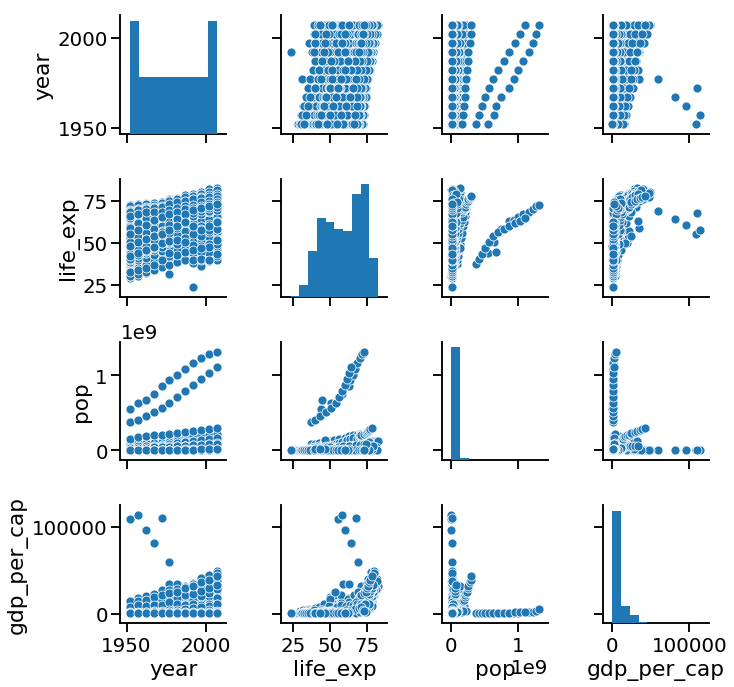

In [54]:
import seaborn as sns

sns.set_context('talk', font_scale=1.2)
sns.pairplot(df);

In [55]:
# transforming left side scewed columns to log scale
df['log_pop'] = np.log10(df['pop'])
df['log_gdp_per_cap'] = np.log10(df['gdp_per_cap'])

df = df.drop(['pop', 'gdp_per_cap'], axis=1)

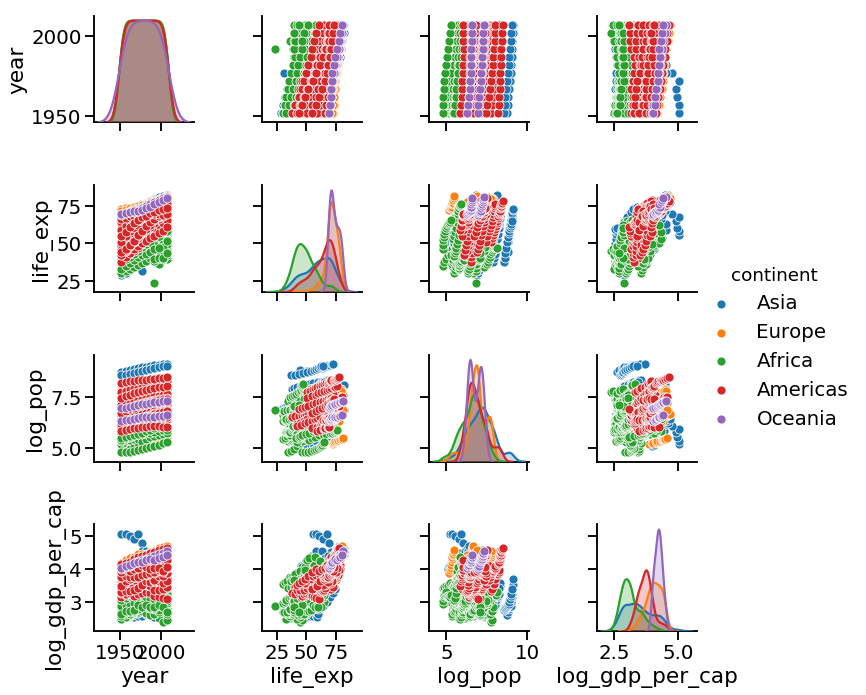

In [66]:
# hue parameter has to be categorical type (not numerical)
matplotlib.rcParams['font.size'] = 18
sns.pairplot(df, hue='continent');

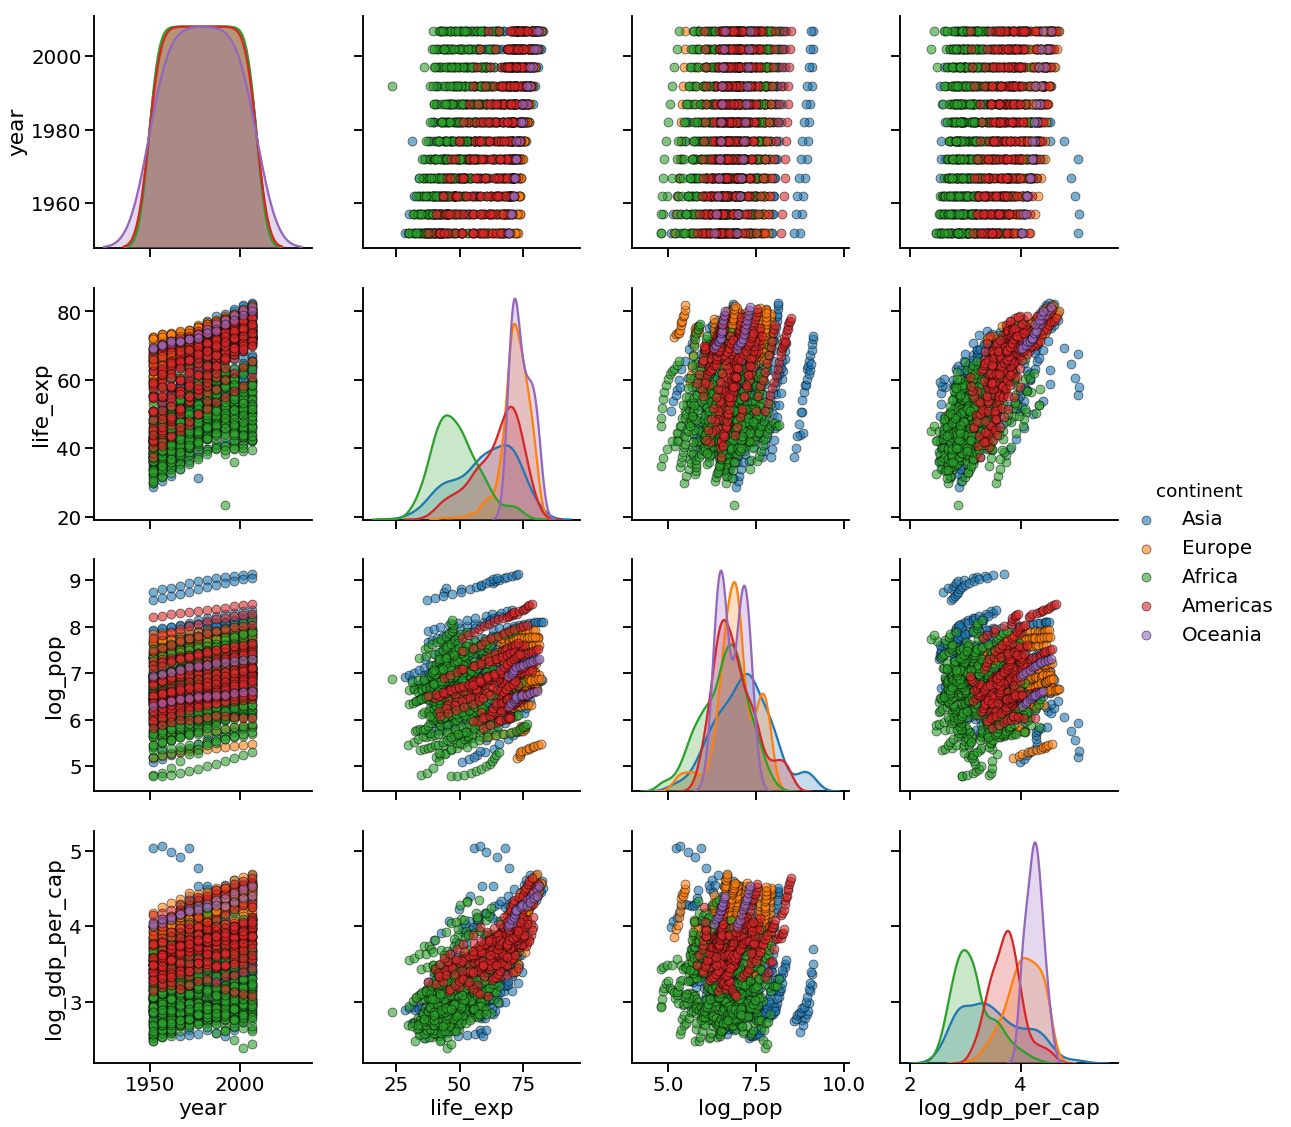

In [78]:
# some customization to pairplot call,
# among it exchange of histogram to the density plot 

sns.pairplot(df, hue='continent', diag_kind='kde',
             plot_kws={'alpha': 0.6, 's':80, 'edgecolor':'k'}, height=4);

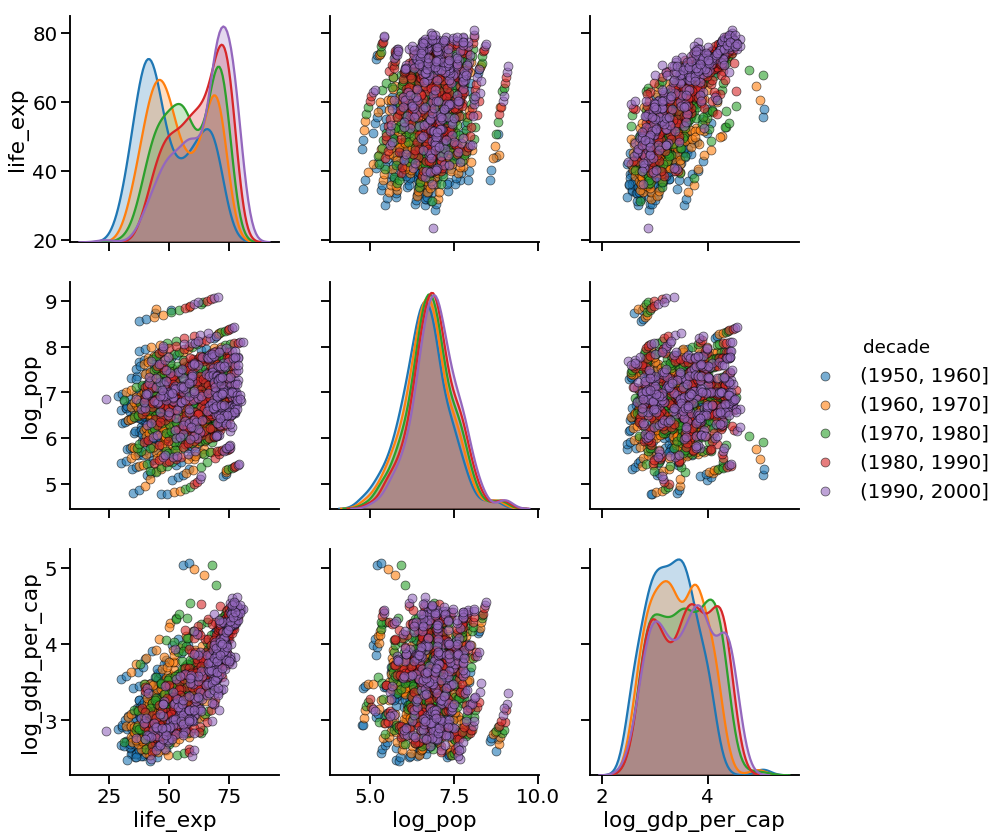

In [80]:
# another plot colored by a decade categorical variable, created from the year column

df['decade'] = pd.cut(df['year'], bins = range(1950, 2010, 10))
#df.head()
sns.pairplot(df, hue='decade', diag_kind='kde', vars=['life_exp', 'log_pop',
                                'log_gdp_per_cap'], plot_kws={'alpha':0.6, 's':80, 'edgecolor':'k'}, height=4);

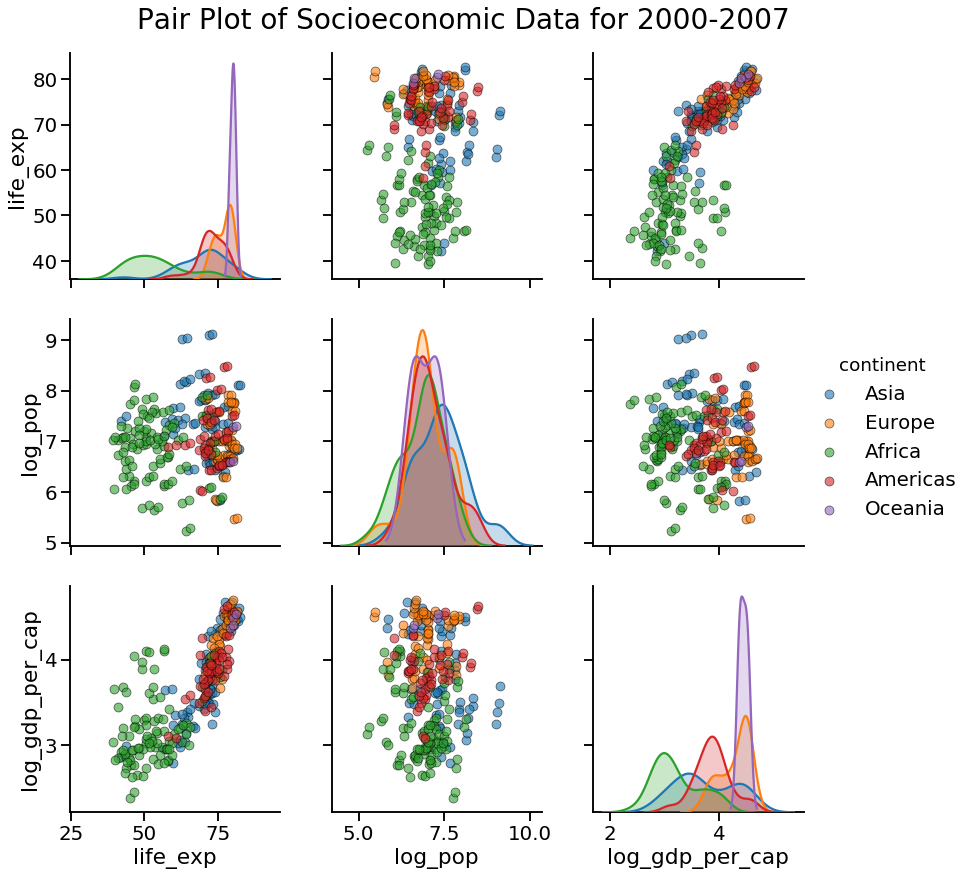

In [87]:
# to better view reduction period to the last years

sns.pairplot(df[df['year']>=2000], hue='continent', diag_kind='kde', vars=['life_exp', 'log_pop',
                                'log_gdp_per_cap'], plot_kws={'alpha':0.6, 's':80, 'edgecolor':'k'}, height=4)
plt.suptitle('Pair Plot of Socioeconomic Data for 2000-2007', size=28, y=1.02);
# fine correlation between life_exp and gdp, below it will be quantified

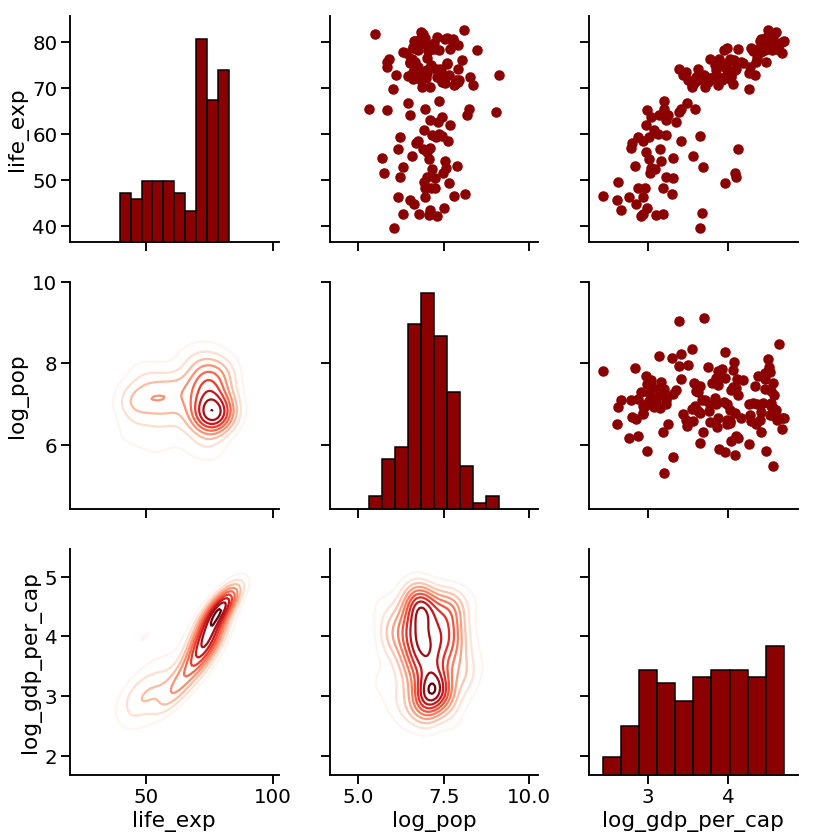

In [97]:
# Customization with PairGrid - the class which does not automatically fill in the plots
# first - creating an instance of the PairGrid class
grid = sns.PairGrid(data=df[df['year'] == 2007], vars=['life_exp', 'log_pop', 'log_gdp_per_cap'], height = 4)

# mapping different plots to different sections
grid = grid.map_upper(plt.scatter, color='darkred')
grid = grid.map_lower(sns.kdeplot, cmap='Reds')
grid = grid.map_diag(plt.hist, bins=10, color='darkred', edgecolor='k');


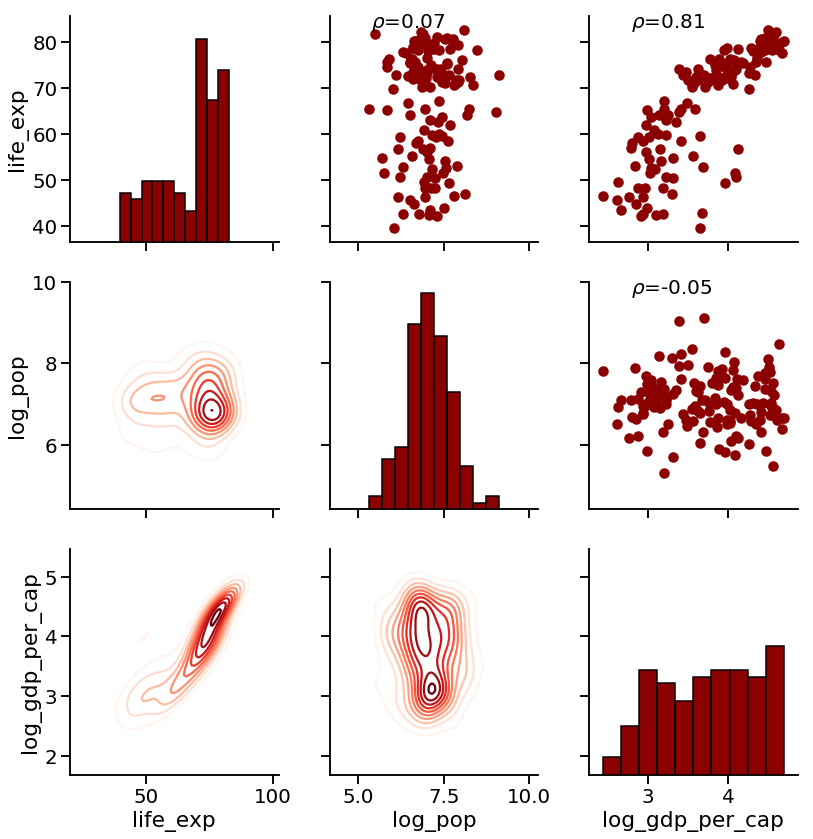

In [99]:
# Function to calculate correlation coefficient between
# two arrays
def corr(x, y, **kwargs):
    # calculate the value
    coef = np.corrcoef(x,y)[0][1]
    # make the label
    label = r'$\rho$=' + str(round(coef, 2))
    
    # add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy=(0.2, 0.95), size=20, xycoords=ax.transAxes)
    
# Create a pair grid instance
grid = sns.PairGrid(data=df[df['year']==2007],
    vars=['life_exp', 'log_pop', 'log_gdp_per_cap'], height=4)

# Map the plots to the locations
grid = grid.map_upper(plt.scatter, color='darkred')
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap='Reds')
grid = grid.map_diag(plt.hist, bins=10, edgecolor='k', color='darkred')
    

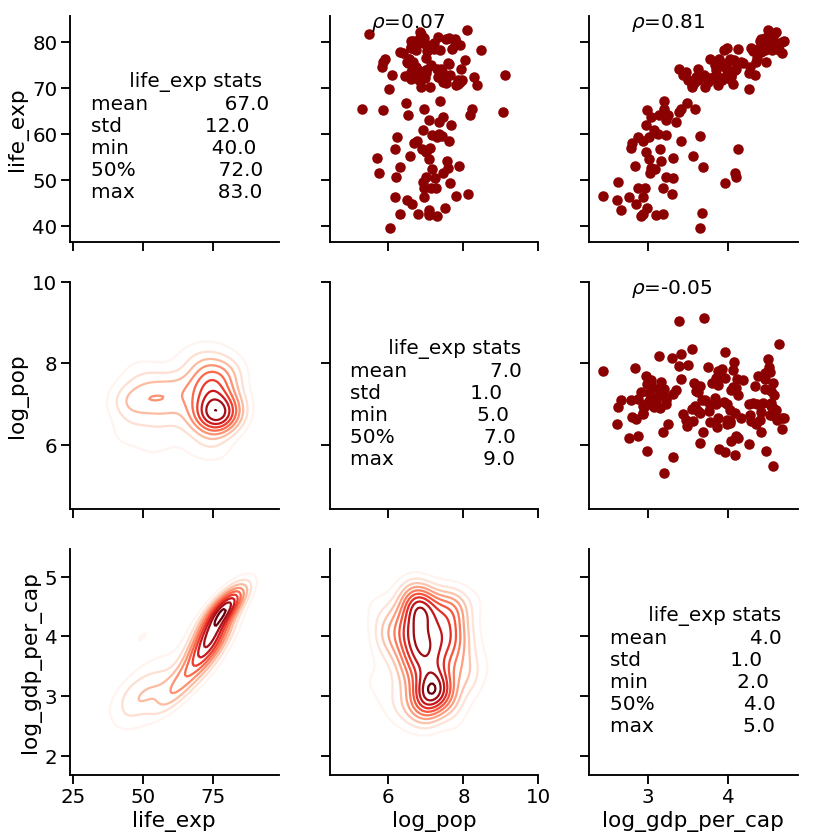

In [101]:
# The plot with summary statistics on the diagonal, instead of the plot
# Define a summary function
def summary(x, **kwargs):
    # Convert to a pandas series
    x = pd.Series(x)
    
    # Get stats for the series
    label = x.describe()[['mean', 'std', 'min', '50%', 'max']]
    
    # Convert from log to regular scale
    # Adjust the column names for presentation
    if label.name == 'log_pop':
        label = 10 ** label
        label.name = 'pop stats'
    elif label.name == 'log_gdp_per_cap':
        label = 10 ** label
        label.name = 'gdp_per_cap stats'
    else:
        label.name = 'life_exp stats'
       
    # Round the labels for presentation
    label = label.round()
    ax = plt.gca()
    ax.set_axis_off()

    # Add the labels to the plot
    ax.annotate(pd.DataFrame(label),
               xy = (0.1, 0.2), size = 20, xycoords = ax.transAxes)    
    

# Create a pair grid instance
grid = sns.PairGrid(data= df[df['year'] == 2007],
                    vars = ['life_exp', 'log_pop', 'log_gdp_per_cap'], height = 4)

# Fill in the mappings
grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid = grid.map_diag(summary);